# EXPLAINER NOTEBOOK

This is the explainer notebook for the New York taxi dataset analysis. It contains all the behind-the-scene details about our website, including all the python code than has been used in order to get the data necessary for our visualizations.

# Motivation

** 1. What is our dataset? **

We have chosen to work on the New York taxi dataset from 2013. It contains all the taxi trips that occured in New York between the $1^{st}$ of January and the $31^{st}$ of December 2013.

However, we soon realized that this was a really huge dataset, containing 173,179,759 rows, representing 5.3 GO of data. The original dataset can be retreived here:  https://nycopendata.socrata.com/view/7rnv-m532

The size of the dataset was a problem, has we need to keep a reasonable loading duration for our visualization. For this reason, we have used a reduced dataset, which can be downloaded here: https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip. It was built by chosing randomly 1/200 datapoints. The selected rows were then ordered chronologically. This is why the dataset we will be working with contains only 846,941 rows, which represents 240 MO of data.

We will give more details about the content of the dataset in the next section of this notebook.

** 2. Why did we choose it? **

Several reasons made us choose this dataset. 

First, it concerns New York, a big city, for which it is really easy to get open data. It was a way to make sure that we would get a dataset whith a good quality, and containing enough information to dive deeply into the dataset.

Moreover, the dataset contains many different columns, giving a wide variety of information, which is interesting because it allows very different kind of analysis depending of the point of view used to analyse the data. For example, we could do nice work with the geodata, but we also have a large range of data related to the details of the trip, as well as all the different factors that have been taken into account when calculating the price of the journey.

Finally, all memebrs of the team were really interested by the taxi dataset in general. It's something that can concern almost everybody, because it is a service we can have an opportunity to use in our everyday life. And we were quite surprised by the number of data that can be generated by a single taxi trip, and it made us want to look deeper into the details of the dataset.

** 3. What is our goal for the user's experience? **

Our main goal is closely related to our motivations for choosing the dataset: we would like to show that even if a single taxi trip can look like simething quite simple, it generates a lot of data, and that the accumulation of data from several trips can reveal erally interesting patterns that might not seem obviously related to taxis.

# Basic Stats

Now, let's try to understand the dataset better.

We have two files, one for the trip itself, and one for the price of the trip. Let's load those two files, and look at the basic information we can retrieve from them.

In [2]:
import csv
from __future__ import division

# Import files for reading
infile = open("nyc_data.csv", 'r')
infile2 = open("nyc_fare.csv", 'r')

reader = csv.reader(infile)
reader2 = csv.reader(infile2)

print 'Information contained in the first file:'
print reader.next()
print '\nInformation contained in the second file:'
print reader2.next()

# Store the rows in lists
taxi_file = []
taxi_file2 = []

for line in reader:     
    taxi_file.append(line)
    
for line2 in reader2:                  
    taxi_file2.append(line2)
    
print '\nNumber of rows in first file:', len(taxi_file)
print 'Number of rows in second file:', len(taxi_file)

Information contained in the first file:
['medallion', 'hack_license', 'vendor_id', 'rate_code', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'trip_time_in_secs', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

Information contained in the second file:
['medallion', 'hack_license', 'vendor_id', 'pickup_datetime', 'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']

Number of rows in first file: 846945
Number of rows in second file: 846945


As we can see, both files have the same number of rows, which is reassuring, because when those two files were constructed, each line in the first file was supposed to correspond to the same trip than the corresponding line in the second file. 

Now, we can look into the details of our dataset. Let's plot some histograms: we will start by extracting all the data we need to plot everything we want.

In [3]:
from collections import Counter
import datetime

months = []
hours = []
weekdays = []
monday_hours = []
tuesday_hours = []
wenesday_hours = []
thursday_hours = []
friday_hours = []
saturday_hours = []
sunday_hours = []

for d in taxi_file:
    daytime = d[5]
    date, time = daytime.split(" ")
    year, month, day = date.split("-")
    my_date = datetime.date(int(year), int(month), int(day))
    weekdays.append(my_date.weekday())
    hour, minute, second = time.split(":")
    months.append(month)
    hours.append(hour)
    if(my_date.weekday() == 0):
        monday_hours.append(hour)
    if(my_date.weekday() == 1):
        tuesday_hours.append(hour)
    if(my_date.weekday() == 2):
        wenesday_hours.append(hour)
    if(my_date.weekday() == 3):
        thursday_hours.append(hour)
    if(my_date.weekday() == 4):
        friday_hours.append(hour)
    if(my_date.weekday() == 5):
        saturday_hours.append(hour)
    if(my_date.weekday() == 6):
        sunday_hours.append(hour)

    hour, minute, second = time.split(":")
    months.append(month)
    hours.append(hour)
    
histogram1 = Counter(months)
histogram2 = Counter(hours)
histogram3 = Counter(weekdays)
histogram4 = Counter(monday_hours)
histogram5 = Counter(tuesday_hours)
histogram6 = Counter(wenesday_hours)
histogram7 = Counter(thursday_hours)
histogram8 = Counter(friday_hours)
histogram9 = Counter(saturday_hours)
histogram10 = Counter(sunday_hours)

Now we can start plotting! We will start easy, by showing the number of pick-ups per month.

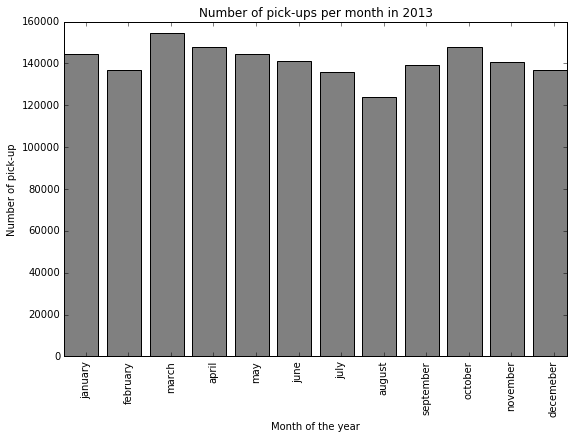

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib import rcParams

sorted_keys =[]
values = []

for key in sorted(histogram1):
    sorted_keys.append(key)
    values.append(histogram1[key])

pos = np.arange(len(sorted_keys))
width = 0.8     # gives histogram aspect to the bar diagram

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
labels=["january","february","march","april","may","june","july","august","september","october","november","decemeber"]
ax.set_xticklabels(labels)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Month of the year')
plt.title('Number of pick-ups per month in 2013')

plt.bar(pos, values, width, color='0.5')
plt.show()

As we can see on this first histogram, the number of pick-ups doesn't change so much over the month. However, we can still see some patterns that we can try to explain.

It seems that the busiest month of the year is march. After that, it slowly decreases before reaching the lowest point in August, and the activity goes back to higher levels from september. 

Two factors could explain this tendancy: the weather and the summer holidays. In march, it might raining a lot while temperatures are still cold, encouraging people to take a cab instead of walking. In the following months, the temperature will increase and the sun will shine. At the same time, people living in New York might go on summer holidays, living the city to the tourists. Those two factors combined can explain part of the pattern observed on the above histogram.

Now, let's look at the number of pick-ups per hour:

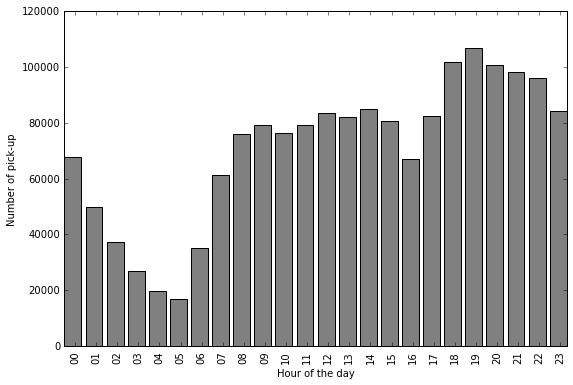

In [4]:
sorted_keys =[]
values = []

for key in sorted(histogram2):
    sorted_keys.append(key)
    values.append(histogram2[key])

pos = np.arange(len(sorted_keys))
width = 0.8

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(sorted_keys)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], sorted_keys, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Hour of the day')

plt.bar(pos, values, width, color='0.5')
plt.savefig("hist_month.jpg")

plt.show()

This time, it looks quite different: we can clearly identify different periods over the day. The busiest one is between 19h and 22h. It probably corresponds to the moment when people live work and/or go out to restaurants or clubs.

We can also notice a really low number of pick-ups between 2 and 5 am. This is probably because most people are sleeping. Then the activity suddenly increases around 7h, when people are starting to go to work.

This histogram was really interesting, but it feels like some part of the story is missing: can we really expect a similar behaviour for the different days of the week? 

Let's first see how the number of pick-ups is distributed over the week.

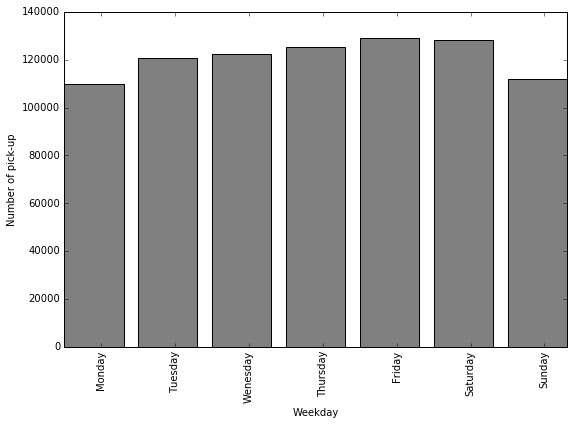

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

sorted_keys =[]
values = []

for key in sorted(histogram3):
    sorted_keys.append(key)
    values.append(histogram3[key])

pos = np.arange(len(sorted_keys))
width = 0.8     # gives histogram aspect to the bar diagram

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
labels=["Monday","Tuesday","Wenesday","Thursday","Friday","Saturday","Sunday"]
ax.set_xticklabels(labels)
plt.xticks([i + 0.5 for i,_ in enumerate(sorted_keys)], labels, rotation='vertical')
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Number of pick-up', )
plt.xlabel('Weekday')

plt.bar(pos, values, width, color='0.5')
plt.savefig("hist_weekdays.jpg")
plt.show()

As we can see, there is no huge difference between the different days. The sunday is the less busy day, probably because this is when most people enjoy family time at home.Monday is also surprisingly low compared to the other days. There is no obvious explenation for this, exept maybe that monday is the closing day for many shops.

Let's now plot the number of pick-ups per hour for each day.

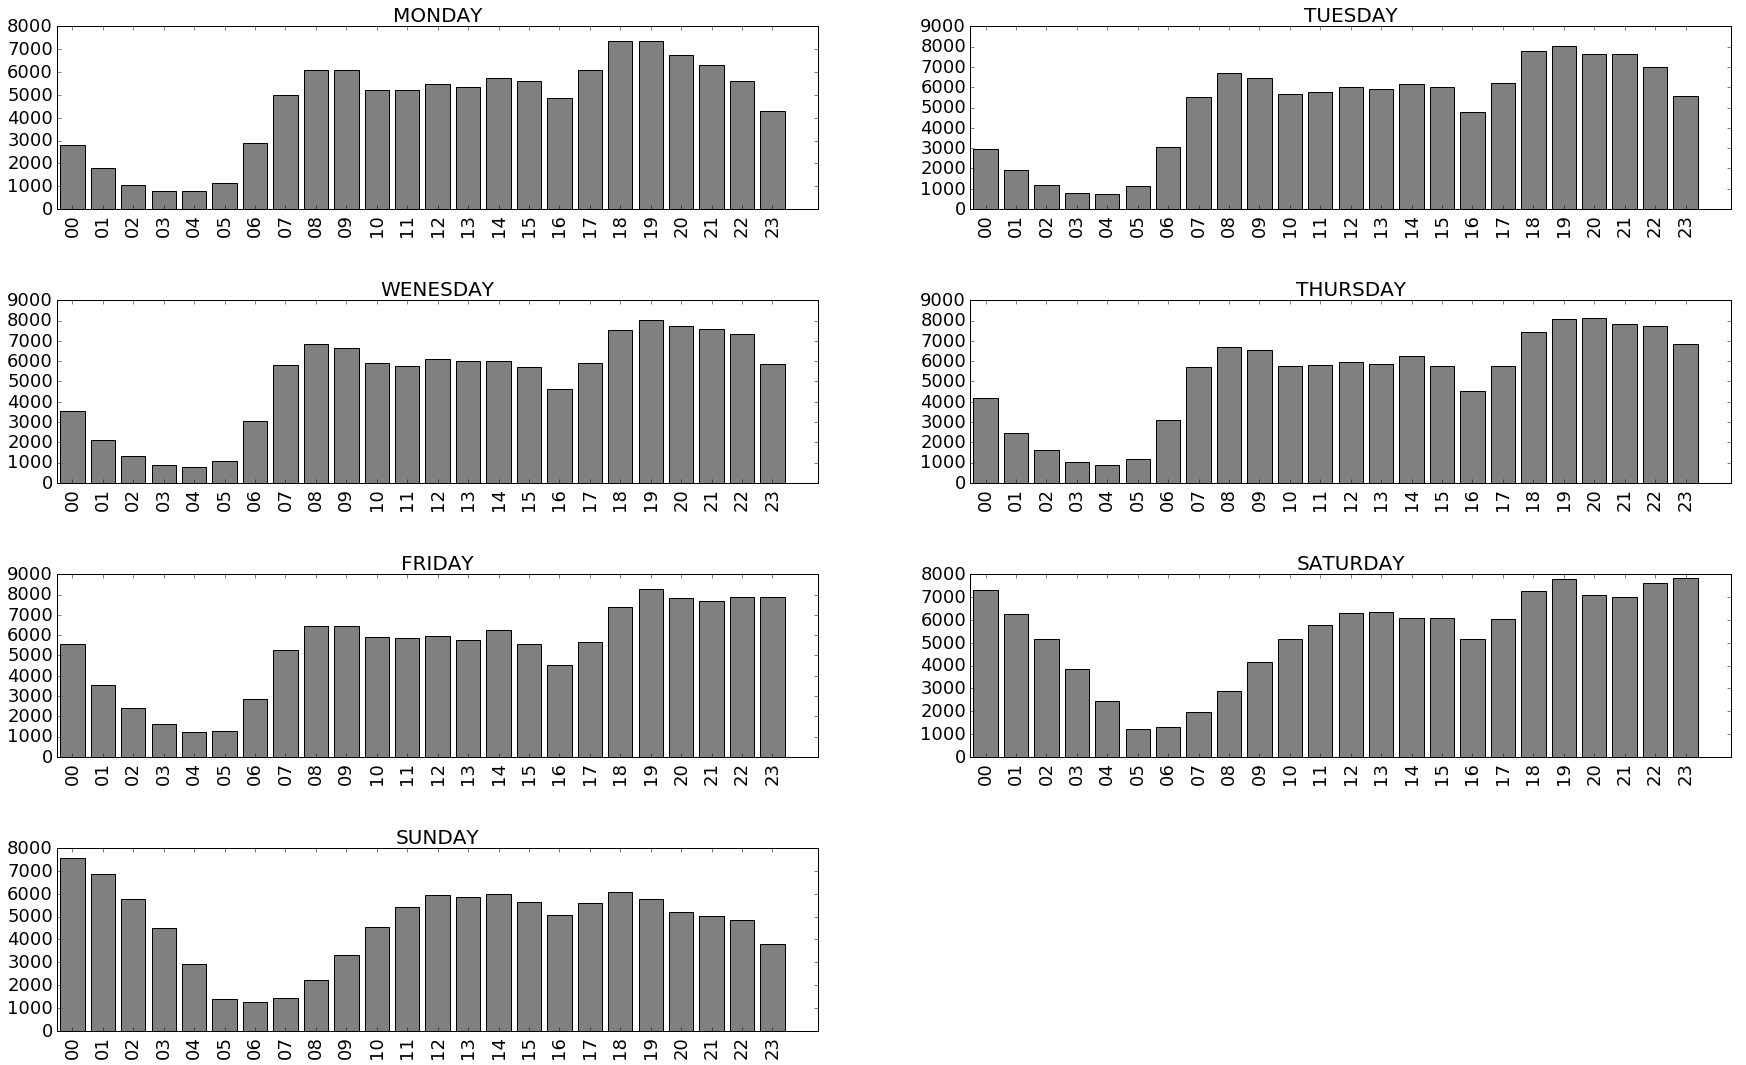

In [7]:
fig, ax = plt.subplots(4, 2)
fig.subplots_adjust(hspace=.5)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

my_file = open("Weekdays.csv", "w")

def plot_hist(i, j, hist, title):
    sorted_keys =[]
    values = []

    for key in sorted(hist):
        sorted_keys.append(key)
        values.append(hist[key])
        my_file.write(title +','+str(key)+','+str(hist[key])+'\n')

    ax[i,j].tick_params(axis='both', which='major', labelsize=18)
    ax[i,j].set_title(title, fontsize=20)
    xs = [k +0.1 for k,_ in enumerate(sorted_keys)]
    ax[i,j].bar(xs, values,color='0.5')   

    ax[i,j].set_xticks([l + 0.5 for l,_ in enumerate(sorted_keys)])
    ax[i,j].set_xticklabels(sorted_keys, rotation='vertical')

plot_hist(0, 0, histogram4, 'MONDAY')
plot_hist(0, 1, histogram5, 'TUESDAY')
plot_hist(1, 0, histogram6, 'WENESDAY')
plot_hist(1, 1, histogram7, 'THURSDAY')
plot_hist(2, 0, histogram8, 'FRIDAY')
plot_hist(2, 1, histogram9, 'SATURDAY')
plot_hist(3, 0, histogram10, 'SUNDAY')
ax[3,1].axis('off')
plt.show()
my_file.close()

This plot is really interesting. First, we can see the same tendancy than what we explained before: a big activity in the evening around 7pm, almost no activity around 5am. We can also note a low activity around 4pm compared to the rest of the afternoon.

However, it is really relevant to compare saturday to other days: the activity at night time is much more import than for any other day. There is a shift compared to the other days: the activity only really starts around the and of the morning, much later than usual, but continues until 3am. This is probably because people are going out on saturday night, and going home with cabs because there are not subways anymore.

So far, we have focused a lot on the pick-ups timing. However, the dataset is so rich that they are many other attributes we can have a look at. 

For example, we can have a look at the geodata we have, with a heat map representing the pick-up locations:

In [7]:
import geoplotlib
from geoplotlib.utils import BoundingBox
import numpy as np
from geoplotlib.utils import BoundingBox

geo_data_for_plotting = {"lat": [float(line[11]) for line in taxi_file],
                         "lon": [float(line[10]) for line in taxi_file]}

geoplotlib.kde(geo_data_for_plotting, bw=5, cut_below=1e-4)
offset = 0.06
geoplotlib.set_bbox(geoplotlib.utils.BoundingBox(north = np.mean(geo_data_for_plotting["lat"]) + offset, south = np.mean(geo_data_for_plotting["lat"]) - offset, east = np.mean(geo_data_for_plotting["lon"]) + offset, west = np.mean(geo_data_for_plotting["lon"])-offset))
geoplotlib.inline()

('smallest non-zero count', 3.6490060938010199e-08)
('max count:', 45.694651843658534)


As we can see, the vast majority of pick-ups are located on Manhattan. 

We could also talk about the distances of the trip, the amount of the trip, and many other attributes we have at our disposal. However, we will talk about them later in our theory section, when such an analysis will be relevant for explaining the machine learning method we've used.

# Theory

Now that we've been briefly over the dataset, it's time to dive even deeper. In this section, we will describe the machine learning methods we've used and applied to problems that seemed relevant to us.

** 1. Predict the tip given by a client **

The first problem we wanted to solve is to predict how much a client is likely to tip. We would like to know if it's going to be a big tip or not. 

We will first try to implement a Logistic regression model based on the following attributes: the number of passengers, the trip duration, the trip distance, and the total amount of the trip (tip excluded of course).

It is important to underline that when a client pays with cach, the amount of the tip indicated is always 0, because it is not recorded by the system. This is why we will only take into account the trips that have been paid with credit card and for which the tip's amount has been automatically recorded.

In [8]:
temp =[]
data = []

#Select necessary attributes from first file
for line in taxi_file:
    data_list = []
    data_list.append(float(line[7]))
    data_list.append(float(line[8]))
    data_list.append(float(line[9]))
    temp.append(data_list)
    

#Select necessary attributes from second file and remove when not paid by credit card    
nb = 0
for line2 in taxi_file2:                   # read through the CSV one line at a time
    if line2[4] == 'CRD':
        price_without_tip = float(line2[5]) + float(line2[6]) + float(line2[7]) 
        data.append(temp[nb] + [price_without_tip] + [line2[8]])
    nb = nb +1
    
print len(data)
print data[0]

456019
[1.0, 960.0, 3.28, 14.5, '2.8']


Now that we have the data, we would like to normalize the numerical attributes. Moreover, instead of predicting the exact amount of the tip, we would just want to predict how big it is likely to be. So the tips have been devided in five categories: low, medium-low, medium, medium-high, and high, based on the mean of the tips in the dataset.

In [9]:
import numpy as np
from __future__ import division

#Get means for normalization
x_mean = np.array([line[:4] for line in data]).mean(axis=0)
x_std = np.array([line[:4] for line in data]).std(axis=0)

#Get mean value of tips and create five categories
y_mean = np.mean([float(d[4]) for d in data])
y_low = y_mean * 2/5
y_medium_low = y_low * 2
y_medium = y_mean * 6/5
y_medium_high = y_mean * 8/5

print "Below ", y_low," a tip is considered low"
print "Between ",y_low," and ", y_medium_low,", a tip is considered low"
print "Between ",y_medium_low," and ", y_medium,", a tip is considered low"
print "Between ",y_medium," and ", y_medium_high,", a tip is considered low"
print "Above ", y_medium_high," a tip is considered high"

i=0
for d in data:
    data[i][0] = (d[0] - x_mean[0])/x_std[0]
    data[i][1] = (d[1] - x_mean[1])/x_std[1]
    data[i][2] = (d[2] - x_mean[2])/x_std[2]
    data[i][3] = (d[3] - x_mean[3])/x_std[3]
    if float(d[4]) < y_low:
        data[i][4] = 'low'
    elif float(d[4]) < y_medium_low:
        data[i][4] = 'medium-low'
    elif float(d[4]) < y_medium:
        data[i][4] = 'medium'
    elif float(d[4]) < y_medium_high:
        data[i][4] = 'medium-high'
    else:
        data[i][4] = 'high'
    i+=1 

Below  0.996702277756  a tip is considered low
Between  0.996702277756  and  1.99340455551 , a tip is considered low
Between  1.99340455551  and  2.99010683327 , a tip is considered low
Between  2.99010683327  and  3.98680911102 , a tip is considered low
Above  3.98680911102  a tip is considered high


Now we are ready to split data into training and testing sets, the trainign ebing around 80% of the data, chosen on a random basis.

In [10]:
import random

train = []
test = []

for d in data:
    rd = random.random()
    if rd < 0.8:
        train.append(d)
    elif rd < 1.0:
        test.append(d)
        
print 'train: ',len(train),' rows'
print 'test: ',len(test),' rows'

train:  364252  rows
test:  91767  rows


And then make the distinction between input and ouput data:

In [11]:
x = [line[:4] for line in train]
y = [line[4] for line in train]

x_test = [line[:4] for line in test]
y_test = [line[4] for line in test]

We can now finally fit a logisitic regression model to our data:

In [12]:
from sklearn import datasets, linear_model

regr = linear_model.LogisticRegression()
regr.fit(x, y)

print'Coefficients: ', regr.coef_

Coefficients:  [[ -2.27229300e-02  -3.95275865e-03   5.28904137e-03   2.63209044e+00]
 [  5.61672297e-02   2.92324456e-03   4.03109347e-03  -2.44371341e-01]
 [ -8.37610138e-03   3.21136136e-03   1.37777474e-03  -2.25901344e-01]
 [ -2.16130183e-03   2.02075651e-03   3.20569850e-03   2.48122891e-01]
 [  6.01736653e-03  -5.22438534e-03   6.48798980e-04  -3.23612804e+00]]


And get its $r^2$ score:

In [13]:
print regr.score(x_test, y_test)

0.581439951181


The $r^2$ score is not that bad, but there is room for improvement. Maybe the logisitic regression approach is not the best: let's try with a decision tree classifier.

In [14]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x, y)
print clf.score(x_test, y_test)

0.592925561476


This is a bit better, but we could also try with a random forest classifier:

In [15]:
from sklearn import ensemble

forest = ensemble.RandomForestClassifier()
forest.fit(x,y)
forest.score(x_test, y_test)

0.62949644207612754

This is even better. Now, maybe we can try to add different features, such as the day of the week and the time of the day. We will need to perform a one-hot encoding to be able to use this kind of data in our models, as it is non numerical data.

In [16]:
from sklearn import preprocessing
import datetime

weekdays = []
hours = []

for d in taxi_file2:
    if d[4] == 'CRD':
        daytime = d[3]
        date, time = daytime.split(" ")
        year, month, day = date.split("-")
        hour, minute, second = time.split(":")
        my_date = datetime.date(int(year), int(month), int(day))
        weekdays.append(my_date.weekday())
        hours.append(hour)  
    

lb = preprocessing.LabelBinarizer()
lb2 = preprocessing.LabelBinarizer()

hours = lb.fit_transform(hours).tolist()
weekdays = lb2.fit_transform(weekdays).tolist()

nb = 0

for d in data:
    data[nb] = data[nb] + hours[nb]
    data[nb] = data[nb] + weekdays[nb]
    nb += 1
    
print data[0]

[-0.49952274252615503, 0.0069147838584908842, -0.0014624231423751382, 0.068583140935160089, 'medium', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


Now that we have a new dataset to work with, we can create new training and testing sets, and try a logisitic regression, a decision tree, and a random forest classifier.

In [17]:
import random

train = []
test = []

for d in data:
    rd = random.random()
    if rd < 0.8:
        train.append(d)
    elif rd < 1.0:
        test.append(d)

x = [line[:4] + line[5:] for line in train]
y = [line[4] for line in train]

x_test = [line[:4]+ line[5:] for line in test]
y_test = [line[4] for line in test]

regr = linear_model.LogisticRegression()
regr.fit(x, y)
print 'R2 for Logistic Regression: ', regr.score(x_test, y_test)

clf = tree.DecisionTreeClassifier()
clf.fit(x, y)
print 'R2 for Decision Tree: ', clf.score(x_test, y_test) 

forest = ensemble.RandomForestClassifier()
forest.fit(x,y)
print 'R2 for Random Forest Classifier: ', forest.score(x_test, y_test)

R2 for Logistic Regression:  0.580869126486
R2 for Decision Tree:  0.562968893959
R2 for Random Forest Classifier:  0.633900759005


There is unfortunately no real improvement. However, we could try one last modification by taking the pick-up and drop-off locations into account.

As usual, let's start by creating a new dataset to work with:

In [18]:
from sklearn import preprocessing
import datetime

locations = []
nb = 0

for d in taxi_file2:
    if d[4] == 'CRD':
        locations.append([float(taxi_file[nb][10])] + [float(taxi_file[nb][11])] + [float(taxi_file[nb][12])] + [float(taxi_file[nb][13])])
        nb+=1
        
print len(locations)
print locations[0]

nb = 0

for d in data:
    data[nb] = data[nb] + locations[nb]
    nb += 1
    
print data[0]

456019
[-73.955925, 40.781887, -73.963181, 40.777832000000004]
[-0.49952274252615503, 0.0069147838584908842, -0.0014624231423751382, 0.068583140935160089, 'medium', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -73.955925, 40.781887, -73.963181, 40.777832000000004]


And now let's look at the scores for the different methods:

In [19]:
import random

train = []
test = []

for d in data:
    rd = random.random()
    if rd < 0.8:
        train.append(d)
    elif rd < 1.0:
        test.append(d)
        
print 'train ',len(train)
print 'test ',len(test)

x = [line[:4] + line[5:] for line in train]
y = [line[4] for line in train]

x_test = [line[:4]+ line[5:] for line in test]
y_test = [line[4] for line in test]

regr = linear_model.LogisticRegression()
regr.fit(x, y)
print 'R2 for Logistic Regression: ', regr.score(x_test, y_test)

clf = tree.DecisionTreeClassifier()
clf.fit(x, y)
print 'R2 for Decision Tree: ', clf.score(x_test, y_test) 

forest = ensemble.RandomForestClassifier()
forest.fit(x,y)
print 'R2 for Random Forest Classifier: ', forest.score(x_test, y_test)

train  364547
test  91472
R2 for Logistic Regression:  0.582582648242
R2 for Decision Tree:  0.561800332342
R2 for Random Forest Classifier:  0.672391551513


After comparing the different techniques and the different attributes that could be taken into account, it looks like the best we can achieve is 67% with a random forest classifier taking into account all the attributes we have.

This is not bad, and it might not be possible to improve more because we would need data that we don't have access to: the amount of the tip might depend a lot on the client's social background such as his age, his profession, his marital status...

** 2. Predict the travel time of a trip**

The other problem we found interesting to solve is the prediction of the time traveling from a point to another. In particular, we focused on the trips from JFK airport. 

In fact, a good estimation of the time spent on a taxi to go from the airport to a meeting for example can be really usefull. And since taxis have their specific lines, a simple estimation with a navigation tool (like a GPS or Google maps) might not be sufficient.

The fisrt step of the analysis is the selection of the relevant data. All the trips are loaded with only the relevant attributes, then only the trips from JFK are selected.

*Note:* If a vizualisation doesn't appear, screenshots can be found on the folder 'notebooks'.

In [59]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [60]:
import csv
infile = open("nyc_data.csv", 'r')   # open the file for reading
reader = csv.DictReader(infile)

reader.next() #remove headers
data = []

for d in reader:                   # select the relevant attributes (pickup/dropoff locations and travel time)
    del d['trip_distance']
    del d['hack_license']
    del d['medallion']
    del d['passenger_count']
    del d['rate_code']
    del d['store_and_fwd_flag']
    del d['vendor_id']
    del d['pickup_datetime']
    del d['dropoff_datetime']
    data.append(d)
    
print data[0]

{'trip_time_in_secs': '960', 'dropoff_longitude': '-73.964943', 'pickup_longitude': '-74.005501', 'pickup_latitude': '40.745734999999996', 'dropoff_latitude': '40.755722'}


In [61]:
import json
from shapely.geometry import Point, shape

# load GeoJSON file containing sectors
f = open('districts.json', 'r')
js = json.load(f)


#Find the polygon associated with JFK Airport
for k in range(0,len(js['features'])):
    if js["features"][k]["properties"]['BoroCD'] == 483:
        print 'ID of JFK airport: ' + str(k)

ID of JFK airport: 46


In [62]:
jfk = []
#select only the trips from JFK (46 = JFK's ID)
polygon = shape(js["features"][46]['geometry'])

for i in range(0,len(data)):
    xCoord = float(data[i]['pickup_longitude'])
    yCoord = float(data[i]['pickup_latitude'])

    point = Point(xCoord,yCoord)

    # check each polygon to see if it contains the point
    if polygon.contains(point):
        #add the point to the list with only time and dropoff location
        del data[i]['pickup_longitude']
        del data[i]['pickup_latitude']
        jfk.append(data[i])
        

print 'Number of trips from JFK: ' + str(len(jfk))
print jfk[0]

Number of trips from JFK: 14008
{'trip_time_in_secs': '1639', 'dropoff_longitude': '-73.972939', 'dropoff_latitude': '40.688128999999996'}


Now a simple plot of this trips can be done. First, a simple function is implemented to have a color corresponding to the travel time, then a map is plotted.

In [63]:
import colorsys

def pseudocolor(val, minval, maxval):
    # convert val in range minval..maxval to the range 0..120 degrees which
    # correspond to the colors red..green in the HSV colorspace
    if val > maxval:
        v = maxval
    else:
        v = val
    h = (float(v-minval) / (maxval-minval)) * 120
    # convert hsv color (h,1,1) to its rgb equivalent

    r, g, b = colorsys.hsv_to_rgb(h/360, 1., 1.)
    #r and g are inverted to have red for the higher values and green for the lower
    return '#' + hexa(g) + hexa(r) + hexa(b)


def hexa(value):
    #convert a float from 0 to 1 into a string with the hexa value 
    dec = int(value * 255)
    string = str(hex(dec)).split('x')[1]
    if dec < 1:
        return '00'
    elif dec < 16:
        return '0' + string
    else:
        return string

In [64]:
import folium

mjfk = folium.Map([40.71,-73.97], tiles='MapBox Bright', zoom_start=10)
#plot 1/20 of the points
for k in [jfk[i] for i in xrange(0,len(jfk),20)]:
    lon = float(k['dropoff_longitude'])
    lat = float(k['dropoff_latitude'])
    time = float(k['trip_time_in_secs'])
    col = pseudocolor(time,0,3600)  #red over 1h
    mjfk.circle_marker(location=[lat,lon], radius=100, line_color='None', fill_color=col)

mjfk

K:\Users\Mat\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


Now the tripsfrom JFK are selected, the prediction will be done with a KNN analysis. Thus, the trip time will be firstly change and categorized. Every trip will have a new attribute 'time_cat' that corrsponds to the multiple of 5 minutes for the trip. The exact trip time is deleted of the list.

In [65]:
#0 -> from 0 to 5 minutes, 1 -> from 5 to 10, ..., 12 -> more than 1h
for k in jfk:
    time = int(k['trip_time_in_secs'])
    if time >= 3600:
        k['time_cat'] = 12
    else:
        k['time_cat'] = int(time/300)
    del k['trip_time_in_secs']

print jfk[0]

{'time_cat': 5, 'dropoff_longitude': '-73.972939', 'dropoff_latitude': '40.688128999999996'}


Now we will prepare the KNN clasifier.

In [66]:
X = []
y = []

for trip in jfk:
    X += [[float(trip['dropoff_latitude']),float(trip['dropoff_longitude'])]]
    y += [int(trip['time_cat'])]

In [67]:
from sklearn.neighbors import KNeighborsClassifier
#3 different classifiers are fit to the data, with 3 different values of K
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh5 = KNeighborsClassifier(n_neighbors=5)

neigh1.fit(X, y)
neigh3.fit(X, y)
neigh5.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The next step is to make a grid for blank point to be classified with the KNN classifiers just made.

A first grid is calculated simply to fill the rectagle defined by the bounds of the boroughs. It can be noticed boroughs were chosen for this process rather than districts since they cover more surface and are thus fewer (only 4, and Staten Island was previously deleted as fewer trips go there). Therefore, the process can be way faster, especially with this library.

In [68]:
from shapely.geometry import Point, shape

f = open('boroughs.json', 'r')
bor = json.load(f)

#Select a point in the middle of the map
bound = (-73.97,40.71,-73.97,40.71)
#find the rectangle in which the boroughs fit
for q in bor['features']:
    lim = shape(q['geometry']).bounds
    bound = (min(bound[0],lim[0]),min(bound[1],lim[1]),max(bound[2],lim[2]),max(bound[3],lim[3]))

print bound

(-74.0477296269704, 40.541820087155216, -73.70000906387122, 40.91553277700519)


In [69]:
#first grid for knn
n = 300 #precision of roughly 100m

grid1 = []
step = (bound[2] - bound[0]) / n
p = [bound[1],bound[0]]
    
while p[0] < bound[3]:
    while p[1] < bound[2]:
        grid1 += [[p[0],p[1]]]
        p[1] += step
    p[0] += step
    p[1] = bound[0]

print len(grid1)

97223


In [70]:
import folium

mgrid1 = folium.Map([40.71,-73.97], tiles='MapBox Bright', zoom_start=10)
#plot 1/125 of the first grid points
for p in range(int(len(grid1)/125) - 1):
    k = grid1[p * 125]
    mgrid1.circle_marker(location=k, radius=100, line_color='None', fill_color='Red')

mgrid1

K:\Users\Mat\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


In [71]:
polygons = []
for b in bor['features']:
    polygons += [shape(b['geometry'])]

In [74]:
grid = []

#For each dot of the first grid, add it to the final grid if it is on a borough
for dot in grid1:
    point = Point(dot[1], dot[0])
    #test if the point is in a borough
    #This piece of code might be pretty ugly, but it was the fastest way for the process (but still ~10 minutes on a small PC)
    if polygons[0].contains(point) or polygons[1].contains(point) or polygons[2].contains(point) or polygons[3].contains(point):
        grid += [dot]

print len(grid)

50392


In [73]:
mgrid = folium.Map([40.71,-73.97], tiles='MapBox Bright', zoom_start=10)
#plot 1/100 of the final grid points
for p in range(int(len(grid)/100) - 1):
    k = grid[p * 100]
    mgrid.circle_marker(location=k, radius=100, line_color='None', fill_color='Red')

mgrid

K:\Users\Mat\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


Now that we have the grid, the final step is to classify every point and store the resulting list in an external file for the vizualistaion.

In [75]:
#Classify the grid points and store it in a list for the exportation
#K = 1
estim1 = neigh1.predict(grid)
data1 = []

for e in range(len(estim1)):
    data1 += [[grid[e][0],grid[e][1],float(estim1[e])]]
    
with open('JFK_KNN1.txt','w') as out:
    out.write(str(data1))
    
    
#K = 3
estim3 = neigh3.predict(grid)
data3 = []

for e in range(len(estim3)):
    data3 += [[grid[e][0],grid[e][1],float(estim3[e])]]
    
with open('JFK_KNN3.txt','w') as out:
    out.write(str(data3))
    
    
#K = 5
estim5 = neigh5.predict(grid)
data5 = []

for e in range(len(estim5)):
    data5 += [[grid[e][0],grid[e][1],float(estim5[e])]]
    
with open('JFK_KNN5.txt','w') as out:
    out.write(str(data5))

**Visualizations**

We have chosen to do different visualisation. It is probably the most important part of the project, as it is what allows us to demonstrate the interest of our results, and to show to everybody, even people who don't know anything about computer science, that we have been able to produce amazing results.
We started by ploting in d3 one of the histograms that has been presented in the basic statistics section. It seemed important for us to put it because it is interesting to see that the number if pick-ups is closely correlated with the daily Life of New York's inhabitant.

Our first visualization is a map of New York, with the pick-ups location represented according to the different hours of the day. It is interesting because it really shows a pattern, and even though it's quite similar to the histogram (we have the same patterns in terms of hourly frequentation), the geographic representation gives a new dimension to our analysis, and it allows user to see quickly what are the most frequented places in New York according to the time of the day.
We have also represented a map of New York correlating pick-ups and drop-offs location. It shows that the pick-up location might influence a lot on the drop_off, has the people frequenting similar neighborhoods are likely to have the same habbits in terms of transportation.

**Discussion**

*What went well?*

We have managed to handle a very huge dataset. Several machine learning techniques have been successfuly applied, giving encouraging results. Moreover we have been able to produce several visualizations, each using different techniques, and we feel that they can help to understand some patterns in the New York taxi dataset.

*What could be improved?*


The biggest challenge was the size of the dataset, eventhough we were only working with a reduced one. Indeed, we had considerable computing times, especially for the KNN algorithm. Moreover, it limited our creativity: some d3 visualizations we wanted to do were abandonned because the loading time in the borwser were too important and the user experience would have been impacted.